### Rock Paper Scissors(Hand Sign) Classification

Classify whether the hand showing rock, paper or scissor?

Datasets:
* !wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  

* !wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip
    
    
I'm the kind of those rather download dataset to local directory, but that's the source!

This is more or less my first Deep Learning Model, feel free to comment on it on how I can improve!

Check CUDA availability

In [1]:
import tensorflow 
print(tensorflow.__version__)

2.2.0


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

Packages needed

In [3]:
import tensorflow as tf
import numpy as np
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import cv2
import os

%matplotlib inline

In [4]:
DATASETS_PATH = "../Dataset/"
TRAINING_FNAME = "rps-train/"
VALIDATION_FNAME = "rps-test-set/"
TEST_FNAME = "rps-used-for-validate/"

TRAINING_DIR = os.path.join(DATASETS_PATH,TRAINING_FNAME)
VALIDATION_DIR = os.path.join(DATASETS_PATH,TRAINING_FNAME)
TEST_DIR = os.path.join(DATASETS_PATH,TEST_FNAME)

Displaying some image

In [5]:
# Datasets
rock_dir = os.path.join(TRAINING_DIR,"rock")
scissors_dir = os.path.join(TRAINING_DIR,"scissors")
paper_dir = os.path.join(TRAINING_DIR,"paper")

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))
print("total validation dataset's Classes:", len(os.listdir(VALIDATION_DIR)))
print("\n")
rock_files = os.listdir(rock_dir)[:10]
print(rock_files)
print("\n")

paper_files = os.listdir(paper_dir)[:10]
print(paper_files)
print("\n")

scissors_files = os.listdir(scissors_dir)[:10]
print(scissors_files)
print("\n")



total training rock images: 840
total training paper images: 840
total training scissors images: 840
total validation dataset's Classes: 3


['rock03-026.png', 'rock03-020.png', 'rock01-113.png', 'rock06ck02-032.png', 'rock02-102.png', 'rock02-018.png', 'rock01-116.png', 'rock05ck01-110.png', 'rock06ck02-075.png', 'rock06ck02-033.png']


['paper06-033.png', 'paper04-064.png', 'paper04-108.png', 'paper05-039.png', 'paper06-088.png', 'paper06-029.png', 'paper01-084.png', 'paper06-007.png', 'paper03-005.png', 'paper01-071.png']


['testscissors01-059.png', 'scissors03-057.png', 'testscissors02-006.png', 'testscissors03-012.png', 'testscissors01-114.png', 'testscissors03-037.png', 'scissors04-059.png', 'testscissors02-062.png', 'scissors04-039.png', 'scissors03-085.png']




### Some Pics

Training Data

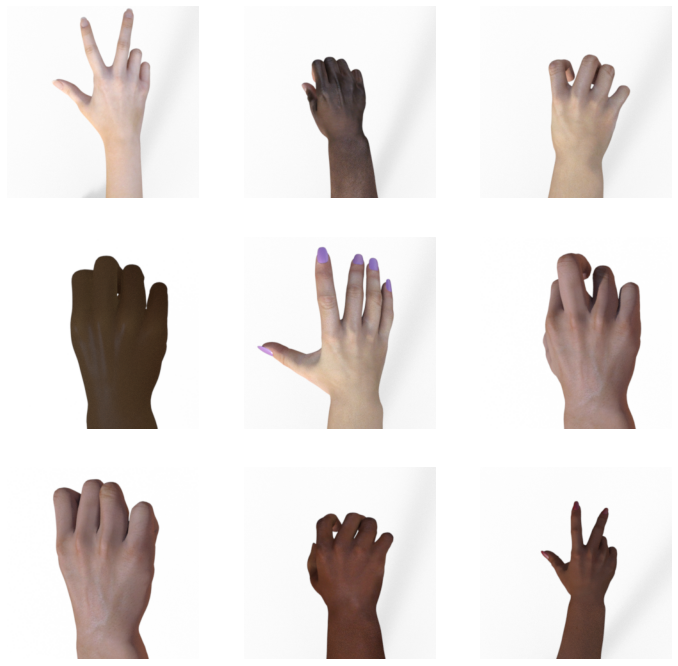

In [6]:
training_images = glob('../Dataset/rps-train/**/*.png')
plt.figure(figsize=(12, 12))    
for i in range(1, 10):
    training_image = np.random.choice(training_images)
    plt.subplot(3, 3, i)
    plt.imshow(cv2.imread(training_image)[...,::-1])
    plt.axis('off')

### Preprocess Images 

- Image augmentation etc.

In [7]:
training_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range =(0.2,1.0),
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [8]:
train_ds = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(300,300),
    class_mode="categorical",
    batch_size=24,
)

validation_ds = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(300,300),
    class_mode = "categorical",
    batch_size=24
)

print(train_ds.class_indices)

Found 2520 images belonging to 3 classes.
Found 2520 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


### Augmented Images

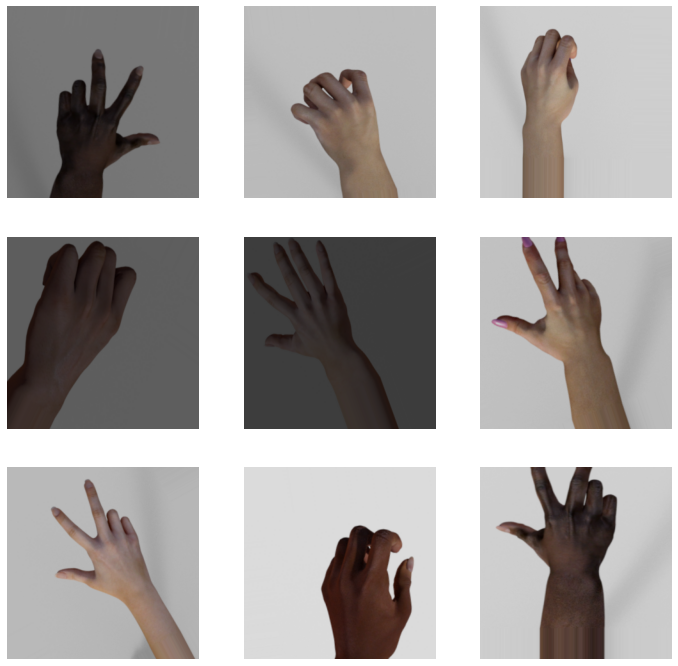

In [9]:
plt.figure(figsize=(12, 12))    
for i in range(1, 10):
    img, label = train_ds.next()
    plt.subplot(3, 3, i)
    plt.imshow(img[0])
    #print(np.shape(img[0]))
    plt.axis('Off')

### Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation=tf.nn.relu, 
                           input_shape=(300,300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, 
                           (3,3), 
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(254, 
                           (3,3), 
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

### Callbacks

In [11]:
# someCallbacks =[
# tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', 
#     mode='min', 
#     verbose=1, 
#     patience=15,
# )]

class someCallbacks(tf.keras.callbacks.Callback ):
    def on_epoch_end(self, epoch,logs={}):
        if((logs.get('accuracy')>0.99) and (logs.get('loss')<0.1) ):
            print("\nAccuracy : > 0.99 & Loss < 0.1 \nCancelling training!")
            self.model.stop_training = True
            
callbacks=someCallbacks()

### Defining Loss function, Optimzer, desired Metrics

In [12]:
loss_func = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(
    loss=loss_func,
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [13]:
## Train the model
from time import time

start = time()



num_epochs = 10

history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=validation_ds,
    verbose = 1,
    steps_per_epoch=79,
    #callbacks=callbacks
)
print(time()-start)
model.save("rps.h5")

Epoch 1/10
79/79 [==============================] - 35s 438ms/step - loss: 1.1029 - accuracy: 0.3244 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - 35s 442ms/step - loss: 1.0987 - accuracy: 0.3381 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 34s 432ms/step - loss: 1.0992 - accuracy: 0.3159 - val_loss: 1.0919 - val_accuracy: 0.4167
Epoch 4/10
79/79 [==============================] - 34s 433ms/step - loss: 0.9627 - accuracy: 0.5206 - val_loss: 0.5334 - val_accuracy: 0.7044
Epoch 5/10
79/79 [==============================] - 36s 453ms/step - loss: 0.5305 - accuracy: 0.7790 - val_loss: 0.1342 - val_accuracy: 0.9369
Epoch 6/10
79/79 [==============================] - 35s 442ms/step - loss: 0.3094 - accuracy: 0.8892 - val_loss: 0.0168 - val_accuracy: 0.9980
Epoch 7/10
79/79 [==============================] - 35s 443ms/step - loss: 0.2103 - accuracy: 0.9277 - val_loss: 0.0157 - val_accuracy: 0.9964

In [11]:
## Train the model
from time import time

start = time()



num_epochs = 10

history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=validation_ds,
    verbose = 1,
    steps_per_epoch=79,
    #callbacks=callbacks
)
print(time()-start)
model.save("rps.h5")

Epoch 1/10
79/79 [==============================] - 31s 398ms/step - loss: 0.0710 - accuracy: 0.9768 - val_loss: 0.0059 - val_accuracy: 0.9988
Epoch 2/10
79/79 [==============================] - 34s 433ms/step - loss: 0.0774 - accuracy: 0.9752 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 3/10
79/79 [==============================] - 33s 417ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.0033 - val_accuracy: 0.9976
Epoch 4/10
79/79 [==============================] - 32s 401ms/step - loss: 0.0739 - accuracy: 0.9810 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 32s 409ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 1.1773e-04 - val_accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 34s 428ms/step - loss: 0.0675 - accuracy: 0.9752 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 33s 419ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 9.0723e-04 - val_accuracy

In [10]:
## Train the model
from time import time

start = time()



num_epochs = 10

history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=validation_ds,
    verbose = 1,
    steps_per_epoch=79,
    #callbacks=callbacks
)
print(time()-start)
model.save("rps.h5")

Epoch 1/10
79/79 [==============================] - 30s 380ms/step - loss: 1.1166 - accuracy: 0.3455 - val_loss: 0.9259 - val_accuracy: 0.5524
Epoch 2/10
79/79 [==============================] - 31s 395ms/step - loss: 0.9228 - accuracy: 0.5607 - val_loss: 0.3676 - val_accuracy: 0.8294
Epoch 3/10
79/79 [==============================] - 31s 392ms/step - loss: 0.5650 - accuracy: 0.7790 - val_loss: 0.0828 - val_accuracy: 0.9786
Epoch 4/10
79/79 [==============================] - 33s 420ms/step - loss: 0.3501 - accuracy: 0.8755 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 5/10
79/79 [==============================] - 34s 424ms/step - loss: 0.2368 - accuracy: 0.9267 - val_loss: 0.0565 - val_accuracy: 0.9778
Epoch 6/10
79/79 [==============================] - 33s 413ms/step - loss: 0.1703 - accuracy: 0.9430 - val_loss: 0.1542 - val_accuracy: 0.9504
Epoch 7/10
79/79 [==============================] - 32s 404ms/step - loss: 0.1282 - accuracy: 0.9546 - val_loss: 0.0216 - val_accuracy: 0.9937

In [ ]:
# ## Train the model
# from time import time

# start = time()



# num_epochs = 30

# history = model.fit(
#     train_ds,
#     epochs=num_epochs,
#     validation_data=validation_ds,
#     verbose = 1,
#     steps_per_epoch=79,
#     callbacks=callbacks
# )
# print(time()-start)
# model.save("rps.h5")

Analyzing the metrics

In [ ]:
history.history;

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.figure()

plt.show()

### Predictions

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from matplotlib import pyplot
import numpy as np

model = tf.keras.models.load_model("rps.h5")

In [ ]:
classes_names = {v: k for k, v in train_ds.class_indices.items()}
# print(classes_names)
# print(type(classes_names))
    
for fn in os.listdir(TEST_DIR):

    path = os.path.join(TEST_DIR, fn).replace("\\","/")
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    score = tf.nn.softmax(classes[0]).numpy()
#     print(score)
#     print(np.argmax(score)) # index in the converted numpy array
#     print(np.max(score)) # Max score in the converted numpy array
    img_show = mpimg.imread(path)
    plt.imshow(img_show)
    plt.title("File Name: {x}\nPredicted:{y}\nwith {cfn:.2f}% Confidence"
              .format(
                  x=fn, 
                  y = classes_names[np.argmax(score)], 
                  cfn =(np.max(score))*100)
             )
    plt.axis('Off')
    plt.show()


Thanks for reading!

## Filters and Feature Map Visualization:

Guide Source: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

### Filters

In [ ]:
model
#print(model.layers[0].get_weights());

In [ ]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
    # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

### Feature Maps

In [ ]:
# Source: https://colab.research.google.com/drive/1dz4m_aLt_1fkCoPxyNp5cIn5U2Z5e9Vk?usp=sharing#scrollTo=CbADCVeKt39z
np.seterr(divide='ignore', invalid='ignore')
# Get list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

# Create a visualization model
visualize_model = Model(inputs = model.input, outputs = layer_outputs)

# Load image for prediction
img= load_img("../Dataset/rps-train/rock/rock01-000.png",target_size=(300, 300))

# Convert image to array
x = img_to_array(img)

# Reshape image for passing it to prediction
x=x.reshape((1,300, 300,3))
#print(x.shape)
# Rescale the image
x = x /255 
feature_maps=visualize_model.predict(x)



layer_names = [layer.name for layer in model.layers]

for layer_names, feature_maps in zip(layer_names,feature_maps):
#     print(feature_maps.shape)
    if len(feature_maps.shape) == 4 :
        channels = feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size, size * channels))
        for i in range(channels):
            x = feature_maps[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
        scale = 20. / channels
        plt.figure(figsize=(scale * channels, scale))
        plt.title(layer_names)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        